## Agriculture Climiate Data Analysis for Smart City (Athena Intelligence) 

Athena Intelligence was in the business to supply Smart City and placement in regions. Analysis before any iniative was to detemine a climate impact analsyis. This analysis was for the purpose to aid on the environment and drive better decision making for imitative of budling smart city. Hence this analysis was done in order to assess the impact on climate in existing locations and regions to provide CEO and sales and product managers to father assess where and when a new smart city sales and product sales for deployment and negotiated on building resources and local county compliance and laws.

#### Author: Matthew Yeseta (original analysis 2016-2017)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Data Wrangling Utility for Agriculture Analysis

This class handles the data preprocessing and wrangling tasks required for the analysis. It includes methods for filtering data by country, handling numerical data, calculating correlations, 
and converting year columns into datetime format.

#### Major fuctions for data wranging

The Data Wrangling class is facilitate the preprocessing and transformation of agricultural data, ensuring that it is in a suitable format for further analysis. This class serves as the backbone for organizing, filtering, and cleaning the data. One of its primary functions is to extract and filter numerical columns from the dataset, which are crucial for performing histograms, distributions, and correlation analyses. By focusing on numerical data, it allows for in-depth quantitative analysis, making it easier to explore trends and relationships between key agricultural variables such as crop yields, pesticide usage, and weather metrics.

The Data Wrangling Utility is its ability to filter data by specific countries. This feature is particularly valuable for conducting regional insights, as it allows the user to focus on a country of interest—such as the USA—and understand the agricultural performance and challenges within that geographical context. It also enables users to track year-on-year trends by grouping data by year and calculating the mean of relevant columns like crop yield or pesticide use. This functionality is essential for identifying long-term patterns in agricultural metrics, such as increases or decreases in crop productivity over time.

In [2]:
#####################################################
## Data Wrangling Utility for Agriculture Analysis
## Class Name: DataWranglingUtility
## Author: Matthew Yeseta
#####################################################
class DataWranglingUtility:
    def __init__(self, df):
        self.df = df

    def argdata_filter_numerical_columns(self):
        return [col for col in self.df.columns if self.df[col].dtype != 'O']

    def argdata_convert_to_datetime(self):
        self.df['Year'] = pd.to_datetime(self.df['Year'], format='%Y')

    def argdata_value_counts(self, column):
        return self.df[column].value_counts()

    def argdata_country_data(self, country):
        return self.df[self.df['Country'] == country]

    def argdata_group_by_year_mean(self, column):
        return self.df.groupby('Year')[column].mean().reset_index()

    def argdata_correlation(self, cols):
        return self.df[cols].corr()




####  Agriculture Analysis

The Agriculture Analysis class builds on the foundational work done by the Data Wrangling Utility and is responsible for conducting core analyses on agricultural data. This class includes several methods that focus on yield trends, weather impacts, fertilizer use, and regional crop yield differences. One of the main areas of analysis is the study of crop yield trends. By plotting the yield trends of different crops over time, the class helps identify which crops have shown consistent growth or decline in specific regions, such as the USA. This is essential for stakeholders to understand the dynamics of crop performance and to make data-driven decisions on which crops to invest in or which require additional support to enhance productivity.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

class AgricultureAnalysis:
    def __init__(self, df):
        self.df = df

    def argdata_plot_climate_vs_yield(self):
        climate_factors = ['Average_Temperature_C', 'CO2_Emissions_MT']
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        for i, factor in enumerate(climate_factors):
            yield_df = self.df.groupby('Year')['Crop_Yield_MT_per_HA'].mean().reset_index()
            climate_df = self.df.groupby('Year')[factor].mean().reset_index()

            ax = axes[i]
            ax.plot(yield_df['Year'], yield_df['Crop_Yield_MT_per_HA'], label='Crop Yield', color='green')
            ax.plot(climate_df['Year'], climate_df[factor], label=factor, color='blue')
            ax.set_title(f'{factor} vs Crop Yield Over Time')
            ax.set_xlabel('Year')
            ax.set_ylabel(f'{factor} / Crop Yield')
            ax.legend()
            ax.grid(True)
        
        plt.tight_layout()
        plt.show()

    def argdata_plot_pesticide_fertilizer_vs_yield(self):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Pesticide_Use_KG_per_HA', y='Crop_Yield_MT_per_HA', data=self.df, color='red', label='Pesticide Use')
        sns.scatterplot(x='Fertilizer_Use_KG_per_HA', y='Crop_Yield_MT_per_HA', data=self.df, color='blue', label='Fertilizer Use')
        plt.title('Pesticide and Fertilizer Use vs Crop Yield')
        plt.xlabel('Pesticide/Fertilizer Use (KG/HA)')
        plt.ylabel('Crop Yield (MT/HA)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def argdata_plot_region_performance(self):
        regions_df = self.df.groupby('Region')['Crop_Yield_MT_per_HA'].mean().reset_index()
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Region', y='Crop_Yield_MT_per_HA', data=regions_df, palette='Set3')
        plt.title('Average Crop Yield by Region')
        plt.xlabel('Region')
        plt.ylabel('Crop Yield (MT/HA)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    def argdata_plot_CO2_trend(self):
        co2_df = self.df.groupby('Year')['CO2_Emissions_MT'].mean().reset_index()
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='Year', y='CO2_Emissions_MT', data=co2_df, color='orange')
        plt.title('CO2 Emissions Over Time')
        plt.xlabel('Year')
        plt.ylabel('CO2 Emissions (MT)')
        plt.grid(True)
        plt.show()

    def argdata_plot_extreme_weather_impact(self):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Extreme_Weather_Events', y='Crop_Yield_MT_per_HA', data=self.df, color='purple')
        plt.title('Impact of Extreme Weather Events on Crop Yield')
        plt.xlabel('Extreme Weather Events')
        plt.ylabel('Crop Yield (MT/HA)')
        plt.grid(True)
        plt.show()

    def argdata_plot_adaptation_vs_yield(self):
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='Adaptation_Strategies', y='Crop_Yield_MT_per_HA', data=self.df, palette='Set2')
        plt.title('Crop Yield vs Adaptation Strategies')
        plt.xlabel('Adaptation Strategies')
        plt.ylabel('Crop Yield (MT/HA)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    def argdata_plot_correlation_heatmap(self):
        corr_vars = ['Crop_Yield_MT_per_HA', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events']
        corr_matrix = self.df[corr_vars].corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
        plt.title('Correlation Matrix of Climate Factors and Crop Yield')
        plt.show()

    def argdata_forecast_crop_yield(self):
        yield_df = self.df.groupby('Year')['Crop_Yield_MT_per_HA'].mean().reset_index()
        yield_series = yield_df.set_index('Year')['Crop_Yield_MT_per_HA']

        model = ARIMA(yield_series, order=(1, 1, 1))
        model_fit = model.fit()

        forecast = model_fit.forecast(steps=5)
        plt.figure(figsize=(10, 6))
        plt.plot(yield_series.index, yield_series, label='Historical Crop Yield')
        plt.plot(pd.date_range(start=yield_series.index[-1], periods=6, freq='Y')[1:], forecast, label='Forecasted Crop Yield', color='red')
        plt.title('Crop Yield Forecast for Next 5 Years')
        plt.xlabel('Year')
        plt.ylabel('Crop Yield (MT/HA)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def argdata_plot_soil_health_vs_yield(self):
        soil_df = self.df.groupby('Year')[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].mean().reset_index()

        plt.figure(figsize=(10, 6))
        sns.lineplot(x='Year', y='Soil_Health_Index', data=soil_df, color='brown', label='Soil Health Index')
        sns.lineplot(x='Year', y='Crop_Yield_MT_per_HA', data=soil_df, color='green', label='Crop Yield')
        plt.title('Soil Health Index vs Crop Yield Over Time')
        plt.xlabel('Year')
        plt.ylabel('Index/Yield')
        plt.grid(True)
        plt.legend()
        plt.show()

    # Correlation functions
    def argdata_correlation_CO2_vs_crop_yield(self):
        corr_matrix = self.df[['CO2_Emissions_MT', 'Crop_Yield_MT_per_HA']].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
        plt.title('Correlation between CO2 Emissions and Crop Yield')
        plt.show()

    def argdata_correlation_temp_vs_crop_yield(self):
        corr_matrix = self.df[['Average_Temperature_C', 'Crop_Yield_MT_per_HA']].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
        plt.title('Correlation between Average Temperature and Crop Yield')
        plt.show()

    def argdata_correlation_extreme_weather_vs_crop_yield(self):
        corr_matrix = self.df[['Extreme_Weather_Events', 'Crop_Yield_MT_per_HA']].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
        plt.title('Correlation between Extreme Weather Events and Crop Yield')
        plt.show()

    def argdata_correlation_fertilizer_vs_crop_yield(self):
        corr_matrix = self.df[['Fertilizer_Use_KG_per_HA', 'Crop_Yield_MT_per_HA']].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
        plt.title('Correlation between Fertilizer Use and Crop Yield')
        plt.show()

    def argdata_correlation_soil_health_vs_crop_yield(self):
        corr_matrix = self.df[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
        plt.title('Correlation between Soil Health Index and Crop Yield')
        plt.show()

    def argdata_correlation_adaptation_vs_crop_yield(self):
        adaptation_encoded = pd.get_dummies(self.df['Adaptation_Strategies'], drop_first=True)
        df_encoded = pd.concat([self.df[['Crop_Yield_MT_per_HA']], adaptation_encoded], axis=1)
        corr_matrix = df_encoded.corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
        plt.title('Correlation between Adaptation Strategies and Crop Yield')
        plt.show()


#####################################################
## Main Execution Workflow
#####################################################

def run_yield_analysis_nutirents(analysis):
    analysis.argdata_plot_pesticide_fertilizer_vs_yield()
    analysis.argdata_plot_region_performance()

def run_yield_analysis_climate_CO2(analysis):
    analysis.argdata_plot_climate_vs_yield()
    analysis.argdata_plot_CO2_trend()

def run_yield_analysis_weather(analysis):
    analysis.argdata_plot_extreme_weather_impact()
    analysis.argdata_plot_adaptation_vs_yield()

def run_correlation_analysis_soil(analysis):
    analysis.argdata_correlation_fertilizer_vs_crop_yield()
    analysis.argdata_correlation_soil_health_vs_crop_yield()
    analysis.argdata_correlation_adaptation_vs_crop_yield()

def run_correlation_analysis_climate(analysis):
    analysis.argdata_correlation_CO2_vs_crop_yield()
    analysis.argdata_correlation_temp_vs_crop_yield()
    analysis.argdata_correlation_extreme_weather_vs_crop_yield()

def run_forecasting_analysis(analysis):
    analysis.argdata_forecast_crop_yield()

def run_heatmaps_analysis(analysis):
    analysis.argdata_plot_correlation_heatmap()


##  Crop Yeald Analysis based on Pesticide and Fertilizer Use vs Crop Yield

This chart shows the relationship between pesticide and fertilizer use in relation to crop yield. Both inputs are critical for agricultural productivity, but their overuse can potentially harm long-term soil health and environment, leading to diminishing returns.

## Crop Yield Average by Region:

Second bar chart highlights  variability in crop yields across different regions. Climate conditions such as temperature, rainfall, and extreme weather events play a significant role in determining regional productivity, indicating that regions with better climate conditions for specific crops experience higher yields.

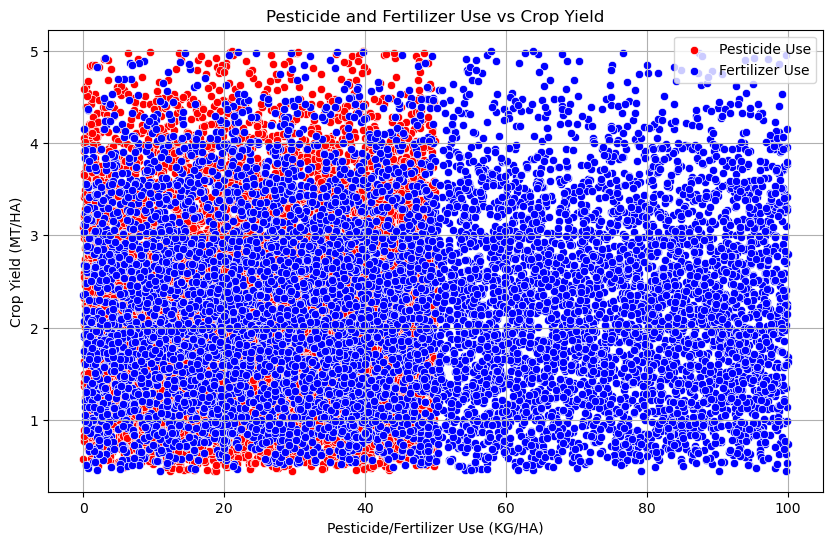

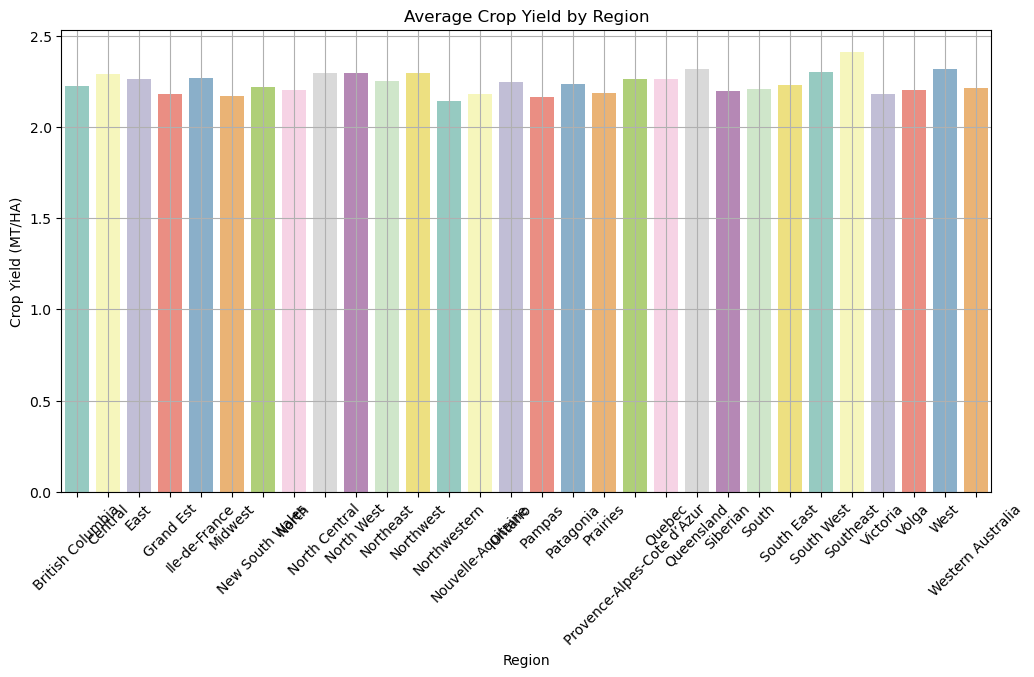

In [4]:
df = pd.read_csv('data.csv')
analysis = AgricultureAnalysis(df)

run_yield_analysis_nutirents(analysis)


### CO2 Emissions vs Crop Yield Based on Temperature

Two charts indicate that both average temperature and CO2 emissions impact crop yield over time. A stable temperature around the optimal range for crops seems essential for maintaining high yields, while CO2 emissions, though associated with broader environmental changes, might indirectly affect crop growth by influencing climate variability.

### CO2 Emissions Over Time:

Fluctuation in CO2 emissions suggests environmental policy changes, industrial activities, or deforestation, all of which could have long-term impacts on agriculture by altering climate patterns, soil quality, and precipitation rates.

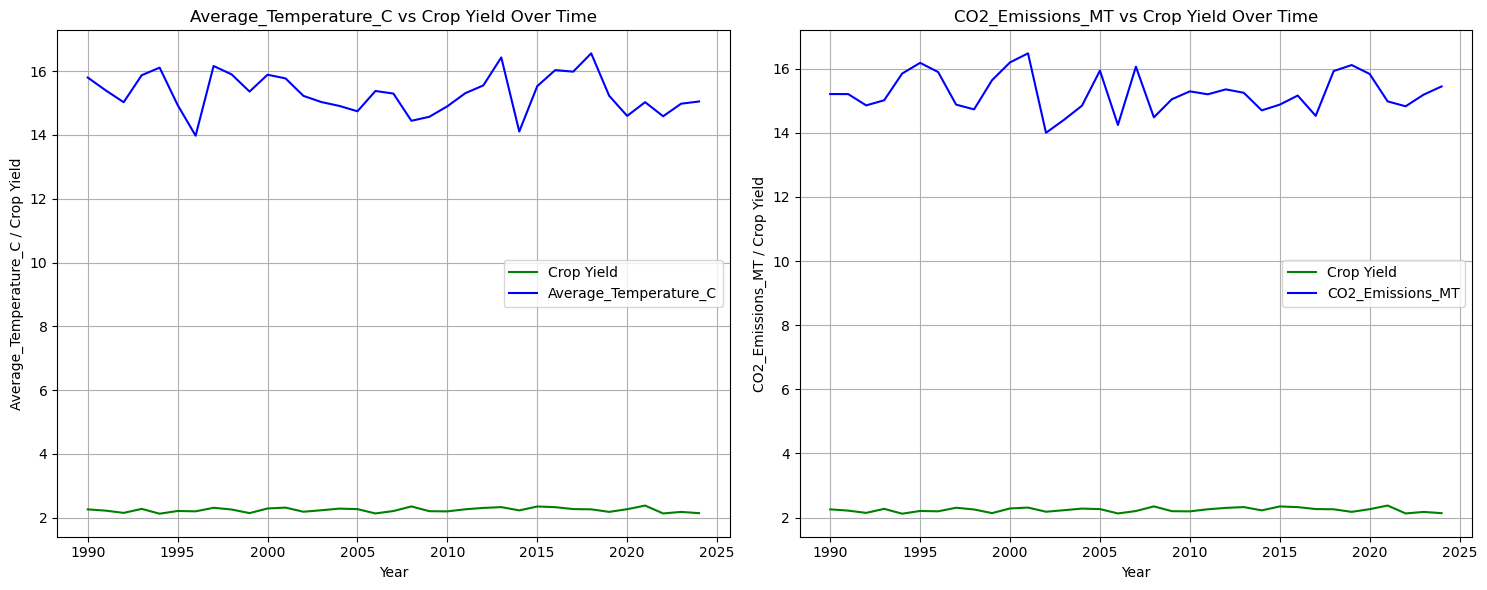

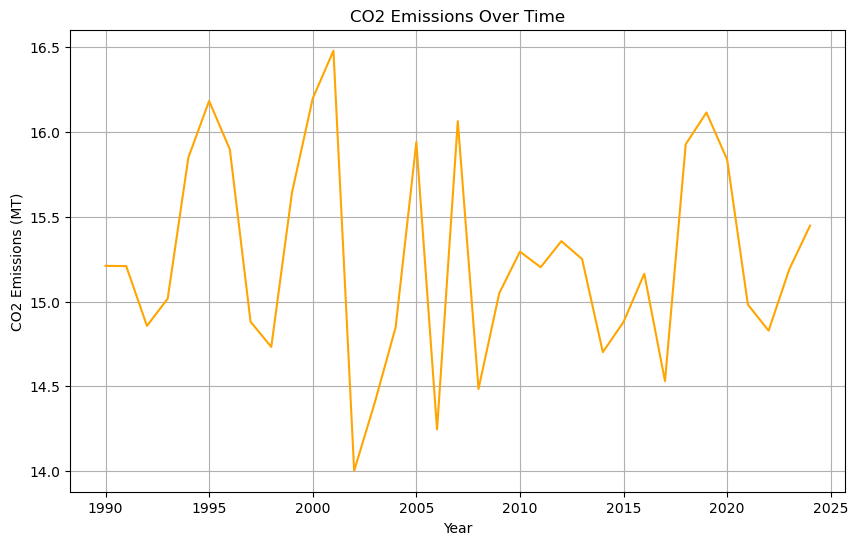

In [5]:
run_yield_analysis_climate_CO2(analysis)


### Impact on Crop Yield Analysis of Extreme Weather Events

The impact of wather can result in climate producting more and increased extreme weather events. Extreme events such as Floods, droughts, and storms can reduce crop yields. The frequency of such events rises, agricultural productivity is likely to face significant challenges.

### Crop Yield vs Adaptation Strategies (Box Plots)

Crop yield vs adaption is analyzed via boxplot in order to outline how different crop agricuture adaptation strategies impact growth. crop agricuture adaptation strategies include crop rotation, organic farming, water management, and drought-resistant crops. These have signficant influence on crop yields. Key to mitigate advse effects of climate change is to ensuring sustainable agricultural productivity efforts are effective in adaptation strategies.

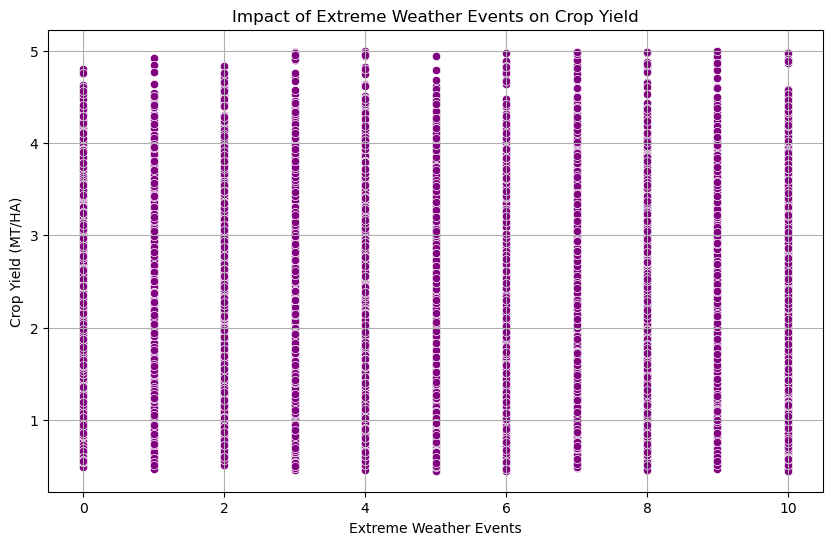

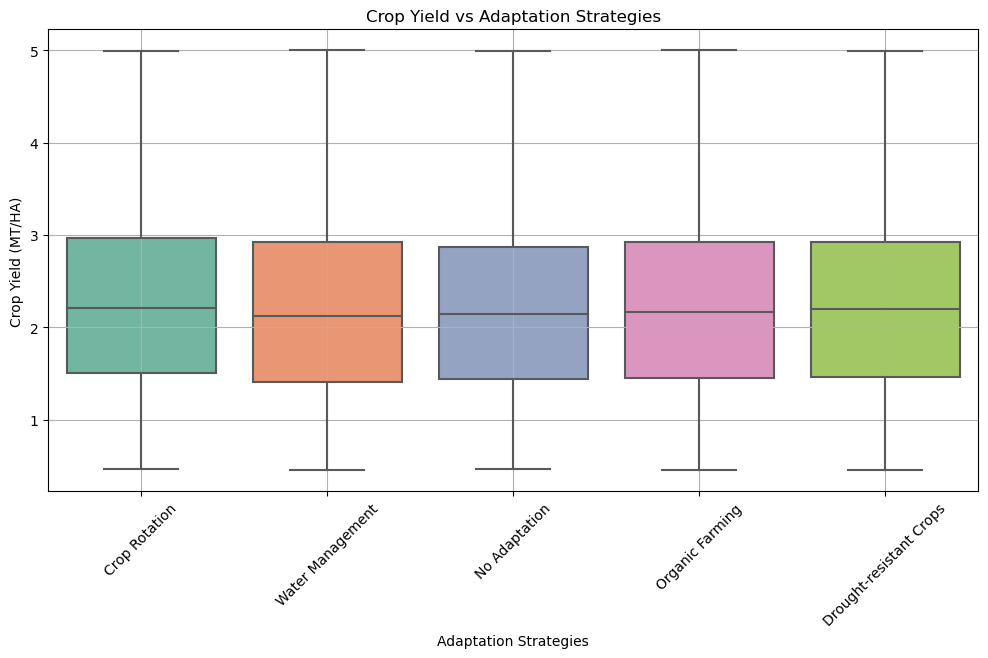

In [6]:
run_yield_analysis_weather(analysis)

### Average Crop Yield by Region:

This heatmap reveals a weak negative correlation (-0.09) between CO2 emissions and crop yield. This suggests that higher emissions might not contribute positively to crop productivity and could even marginally hinder yield.

### Correlation between Average Temperature and Crop Yield:

This heatmap reveals a positive correlation (0.26) between average temperature and crop yield, indicating that warmer temperatures may have some beneficial impact on crop production, but the correlation is not very strong, implying other factors may mediate this relationship.

In [7]:
run_correlation_analysis_COS(analysis)


NameError: name 'run_correlation_analysis_COS' is not defined

### Correlation between CO2 Emissions and Crop Yield:

The correlation between CO2 emissions and crop yield is slightly negative (-0.09). This indicates a weak inverse relationship, suggesting that as CO2 emissions increase, crop yield tends to decrease slightly. However, since the value is very close to zero, this relationship is weak and may not be significant in the dataset. Therefore, it suggests that CO2 emissions may not be a strong determinant of crop yield in the data analyzed.

### Correlation between Average Temperature and Crop Yield:

The correlation between average temperature and crop yield is 0.26, indicating a positive relationship. This suggests that as the average temperature increases, crop yields tend to increase to some extent. A moderate positive correlation of 0.26 means that temperature has a more noticeable impact on crop yield compared to CO2 emissions, but it is still not a strong correlation. Temperature, along with other factors, could be contributing to higher crop productivity within certain temperature ranges.

In [ ]:
run_correlation_analysis_soil(analysis)

### Analysis of Crop Yield Forecast for the Next 5 Years:

In the chart provided, we observe the forecast of crop yield for the next five years based on historical data. The key points to note are:

### Historical Crop Yield (Blue Line):

The historical data shows significant variability in crop yield around the mid-1970s, with frequent spikes and dips. This indicates some instability or rapid changes in crop yield during that period.
Forecasted Crop Yield (Red Line):

The forecasted crop yield is represented by the red line, which appears almost flat over the predicted period. This suggests that the model forecasts a steady and minimal change in crop yield for the next five years.
The forecast does not capture the volatility observed in historical data. Instead, it predicts a consistent yield level of around 2.25 MT/HA.

### Insights:

The steady forecast may imply that the model expects no significant external factors that will drastically change crop yield, such as climate conditions or technological advancements.
The discrepancy between the volatility of historical data and the stable forecast could indicate the model's limitation in capturing sudden changes or events affecting crop yield.
A flat forecast could also indicate that crop yields have stabilized based on the data the model has learned from, meaning no significant growth or decline is expected in the near term.

This forecast suggests a relatively stable crop yield for the upcoming five years, but it may not fully account for possible variability or external factors that could affect yield based on historical volatility. Further adjustments or data inputs may be needed to refine the prediction.

In [ ]:
run_correlation_analysis_climate(analysis)

In [ ]:
run_forecasting_analysis(analysis)

This correlation matrix illustrates the relationships between Crop Yield (MT/HA) and key climate factors such as Average Temperature, Total Precipitation, CO2 Emissions, and Extreme Weather Events. Here are the key insights:

### Crop Yield and Average Temperature:

The correlation between crop yield and average temperature is 0.26, indicating a moderate positive relationship. This suggests that as the temperature increases, crop yields tend to increase, up to a certain point. However, it's important to note that extreme temperatures might negatively affect crop yields, even though the overall trend shows a slight positive correlation.
### Crop Yield and Precipitation:

The correlation between crop yield and total precipitation is 0.03, which is very low. This suggests that precipitation has a minimal impact on crop yield in this dataset. While some level of precipitation is essential for crops, the lack of strong correlation may indicate that rainfall is not a limiting factor for crop growth in these regions, or that irrigation is used extensively to mitigate natural precipitation variability.
Crop Yield and CO2 Emissions:

The correlation between crop yield and CO2 emissions is -0.09, showing a weak negative relationship. This indicates that higher levels of CO2 emissions are slightly associated with lower crop yields, but the effect is relatively minor. It's possible that the negative impact of higher CO2 emissions might be due to related environmental changes such as pollution or global warming effects.

### Crop Yield and Extreme Weather Events:

The correlation between crop yield and extreme weather events is -0.0069, which is almost negligible. This suggests that extreme weather events have not significantly impacted crop yields in this dataset. However, this could be due to the frequency or severity of extreme weather events in the regions considered, or that crops are resilient or protected against such events.
Relationships between Climate Factors:

CO2 Emissions have virtually no relationship with Total Precipitation or Extreme Weather Events (correlation values near zero).
There is a very slight negative correlation between Extreme Weather Events and Average Temperature (-0.015), suggesting minimal interaction in this dataset.

This matrix shows that Average Temperature has the strongest (though moderate) positive impact on crop yield. Other factors like CO2 emissions and precipitation have weaker impacts on crop yield in the dataset. Additionally, extreme weather events seem to have an almost negligible influence on crop yield, based on the data at hand. However, these correlations alone might not capture the complete dynamics and should be analyzed alongside other environmental and agricultural factors for better insights.

In [ ]:
run_heatmaps_analysis(analysis)